In [13]:
import pandas as pd
import osmnx as ox
import geopandas as gpd
import networkx as nx

In [5]:
lx = ox.graph_from_place('Lisbon, Portugal', network_type= 'drive')

In [6]:
lxstreet = ox.project_graph(lx)

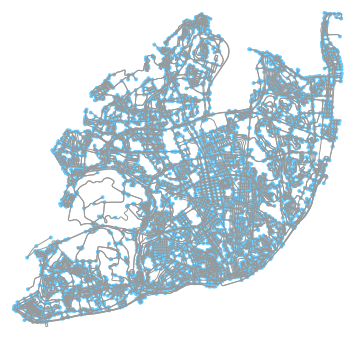

(<Figure size 440.303x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc3d51aec90>)

In [7]:
ox.plot_graph(lxstreet)

In [11]:
ox.save_graph_shapefile(lxstreet, filename = 'myosmplx')

In [17]:
lxedges = gpd.read_file('data/myosmplx/edges/edges.shp')

In [18]:
lxedges.columns

Index(['key', 'osmid', 'oneway', 'name', 'highway', 'length', 'from', 'to',
       'maxspeed', 'tunnel', 'lanes', 'junction', 'access', 'bridge', 'width',
       'ref', 'geometry'],
      dtype='object')

In [19]:
lxnodes = gpd.read_file('data/myosmplx/nodes/nodes.shp')

In [22]:
lxnodes.highway.unique()

array([None, 'crossing', 'traffic_signals', 'motorway_junction',
       'turning_circle', 'turning_loop', 'mini_roundabout'], dtype=object)

In [23]:
lxedges.columns

Index(['key', 'osmid', 'oneway', 'name', 'highway', 'length', 'from', 'to',
       'maxspeed', 'tunnel', 'lanes', 'junction', 'access', 'bridge', 'width',
       'ref', 'geometry'],
      dtype='object')

In [24]:
lxedges

,key,osmid,oneway,name,highway,length,from,to,maxspeed,tunnel,lanes,junction,access,bridge,width,ref,geometry
0,0,218562229,True,Praça das Indústrias,residential,68.15,233111561,233111588,None,None,None,None,None,None,None,None,"LINESTRING (484163.849 4283379.526, 484140.522..."
1,0,21640904,True,Praça das Indústrias,residential,96.37299999999999,233111571,233111561,None,None,None,None,None,None,None,None,"LINESTRING (484073.820 4283348.257, 484080.921..."
2,0,21640902,True,Praça das Indústrias,residential,11.388,25081634,233111561,None,None,None,None,None,None,None,None,"LINESTRING (484168.307 4283369.064, 484163.849..."
3,0,21644525,True,Praça das Indústrias,residential,15.158999999999999,233111571,233197169,None,None,None,None,None,None,None,None,"LINESTRING (484073.820 4283348.257, 484075.320..."
4,0,218562230,True,Praça das Indústrias,residential,73.267,233111577,233111571,None,None,None,None,None,None,None,None,"LINESTRING (484053.308 4283418.462, 484056.131..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14230,0,410678957,True,Avenida de Roma,secondary,31.217,247037872,247037873,None,None,3,None,None,None,None,None,"LINESTRING (487479.974 4289367.765, 487485.382..."
14231,0,744814376,True,Avenida Carlos Paredes,tertiary,176.51,1631518664,1631518662,None,None,2,None,None,None,None,None,"LINESTRING (486918.497 4291762.492, 486904.553..."
14232,0,35779442,True,Rua do Sol a Santa Catarina,residential,76.859,418349004,418348999,None,None,None,None,None,None,None,None,"LINESTRING (487177.415 4284636.554, 487102.384..."
14233,0,744814377,True,Avenida Carlos Paredes,residential,86.79,1631518666,1631518665,None,None,2,None,None,None,None,None,"LINESTRING (487318.873 4291801.336, 487232.384..."


In [27]:
for x in ['maxspeed', 'tunnel', 'lanes', 'junction', 'access', 'bridge', 'width', 'ref']:
    print(x, ': ', lxedges[str(x)].unique(), '\n')

maxspeed :  [None '50' '30' '40' "['40', '30']" "['90', '120']" '90' '120' '80' '20'
 "['80', '60']" '70' '60' "['50', '40']" "['80', '50']" "['60', '40']"
 '65 mph' "['30', '20']"] 

tunnel :  [None 'building_passage' 'yes' "['building_passage', 'yes']" 'covered'] 

lanes :  [None '3' '2' '1' "['3', '2']" '4' "['5', '4']" "['1', '2']" "['6', '2']"
 '6' "['6', '4']" "['1', '3', '2']" "['5', '6']" "['5', '2']" "['3', '4']"
 '5' "['3', '4', '2']" "['4', '2']" "['5', '3', '4']" "['1', '3']"
 "['5', '6', '4']" "['5', '3']" "['6', '3', '2']" "['6', '7']"] 

junction :  [None 'roundabout'] 

access :  [None 'permissive' 'residents' 'yes' 'no' 'designated' 'permit' 'forestry'
 'destination' 'delivery'] 

bridge :  [None 'yes' "['yes', 'viaduct']" 'viaduct'] 

width :  [None '3' '5' '4' '15' '2.5' '3.6' '2' '1.20'] 

ref :  [None 'A 5' 'EN 117' 'EN 6' 'IP 7' 'A 2;IP 7' 'IC 17;A 36' 'Porta Sul'
 'IC 19;A 37' 'IC 2;A 30'] 



In [37]:
pd.read_csv('Ironhack/ridehail/ridehail/municipios.csv', sep = ';', encoding = 'latin1')

,Unnamed: 0,Unnamed: 1,Sex,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,MF,M,F,NaN
1,NaN,NaN,Age group,NaN,NaN,NaN
2,NaN,NaN,Total,NaN,NaN,NaN
3,NaN,NaN,No.,No.,No.,NaN
4,2018.0,PT: Portugal,10276617,4852366,5424251,NaN
5,NaN,1: Continente,9779826,4615656,5164170,NaN
6,NaN,17: Área Metropolitana de Lisboa,2846332,1331103,1515229,NaN
7,NaN,170: Área Metropolitana de Lisboa,2846332,1331103,1515229,NaN
8,NaN,1701502: Alcochete,19505,9327,10178,NaN
9,NaN,1701503: Almada,168987,78866,90121,NaN
